In [301]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [302]:
df = pd.read_csv('data_copy.csv')

In [253]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [254]:
print("Number of Country/Region is", df['Country/Region'].nunique())

print("Countries with Province/State informed are"
      , df[df['Province/State'].isna()==False]['Country/Region'].unique())

Number of Country/Region is 163
Countries with Province/State informed are ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


In [255]:
df.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737
std,7624.675152,22.935092,79.923261,3538.599684,174.346267
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000


Text(0.5, 0, 'Date')

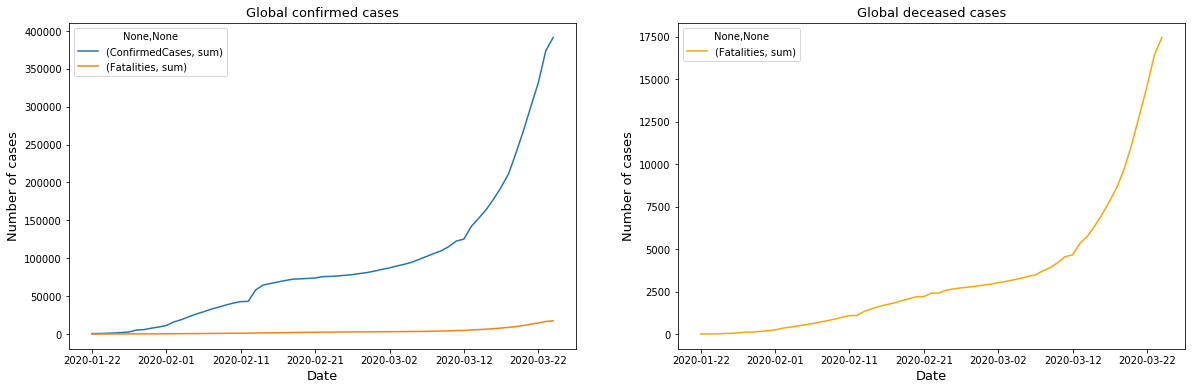

In [256]:
confirmed_dates = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_dates = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_dates = confirmed_dates.join(fatalities_dates)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
total_dates.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_dates.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

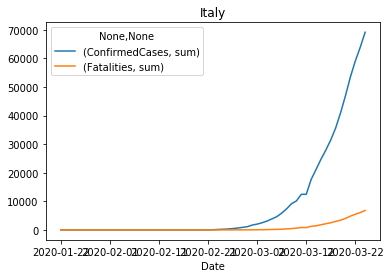

In [259]:
confirmed_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)
total_date_Italy.plot(ax=plt.gca(), title='Italy')

In [292]:
# building datasets for every country
countries_data = {}
for c in df['Country/Region'].unique():
    countries_data[c]=df[(df['Country/Region'] == c) & (df['Lat'] == df[df['Country/Region'] == c].Lat.iloc[0])]
    countries_data[c].insert(0, 'New_ID', countries_data[c].Id - countries_data[c].Id.iloc[0])

In [303]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [313]:
# applying polynomial regression

In [321]:
def build_model(c):

    X = np.array(countries_data['US']['New_ID']).reshape(-1, 1)
    y = np.array(countries_data['US']['ConfirmedCases'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scores = []

    for i in range(1, 11):
        print("Euation of "+str(i)+" Degree BEGINS")
        poly = PolynomialFeatures(degree=i)
        poly_x = poly.fit_transform(X_train)
        pol_reg = LinearRegression()
        pol_reg.fit(poly_x, y_train)
        print("Euation of "+str(i)+" Degree Ends with acc = "+str(pol_reg.score(poly.fit_transform(X_test), y_test)*100) + "%")
        scores.append(pol_reg.score(poly.fit_transform(X_test), y_test))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    ax1.plot(X, y)
    ax1.set_title(c + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date_ID", size=13)
    ax2.plot(range(1, 11), scores, color='orange')
    ax2.set_title("Accuracy vs. Degree", size=13)
    ax2.set_ylabel("Accuracy", size=13)
    ax2.set_xlabel("Degree", size=13)
    
    # finding best degree for each country

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 29.1916891780465%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 62.80608029962186%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 87.64314028152178%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 97.57416906164981%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.23954963687628%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.37524814705215%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.21891143884064%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.13523072604545%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.04601626256334%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 98.97934430101756%


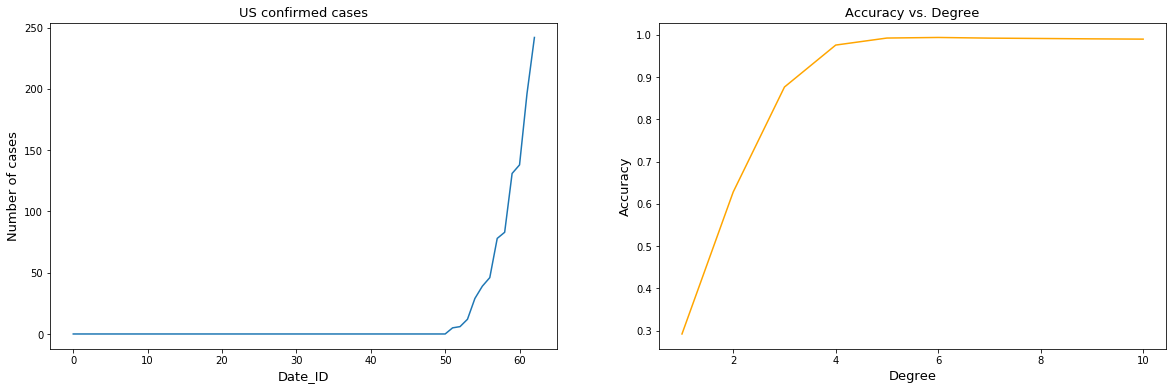

In [322]:
build_model('US') # for USA

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -42.485354654768216%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 3.810569153399601%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 39.90768561321005%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 76.90254379401343%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 94.05665965394108%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 98.28346583531324%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 98.52752362675446%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.26096898729824%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 98.20540498441501%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 98.2246724838096%


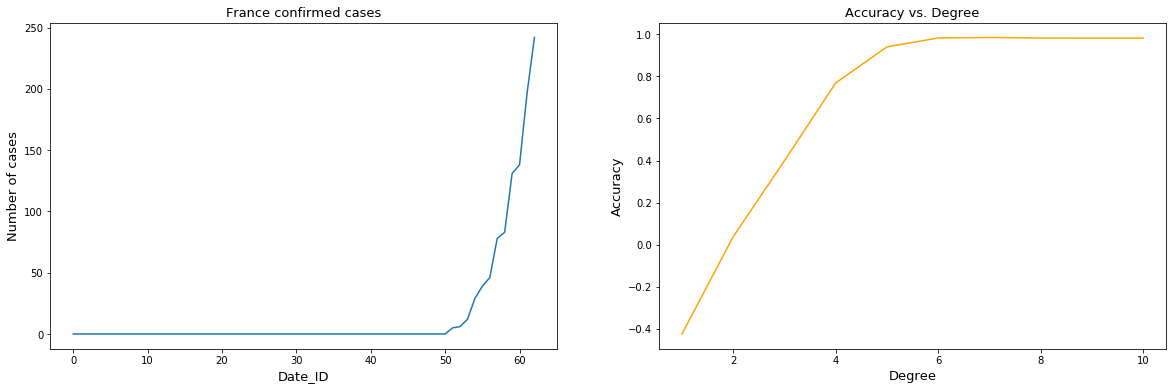

In [323]:
build_model('France') # for France

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -261.79588006432795%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -353.20261317142257%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -131.25165685452234%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 53.13807257382797%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 87.92305182380863%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 98.39033027777919%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 98.67267524566469%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.68830243941386%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 98.61718867994695%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 98.62185326432822%


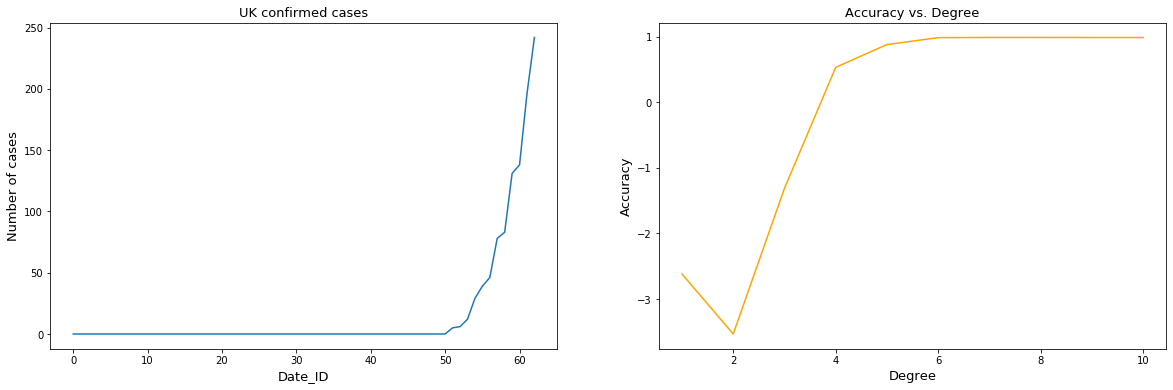

In [324]:
build_model('UK') # for UK

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 30.55456606467316%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 58.17182646150081%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 83.9094505946334%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 96.01776507017658%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.31440691327809%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.82747335911016%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.84051624780844%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.85127043539187%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.85265506822311%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.84289496905099%


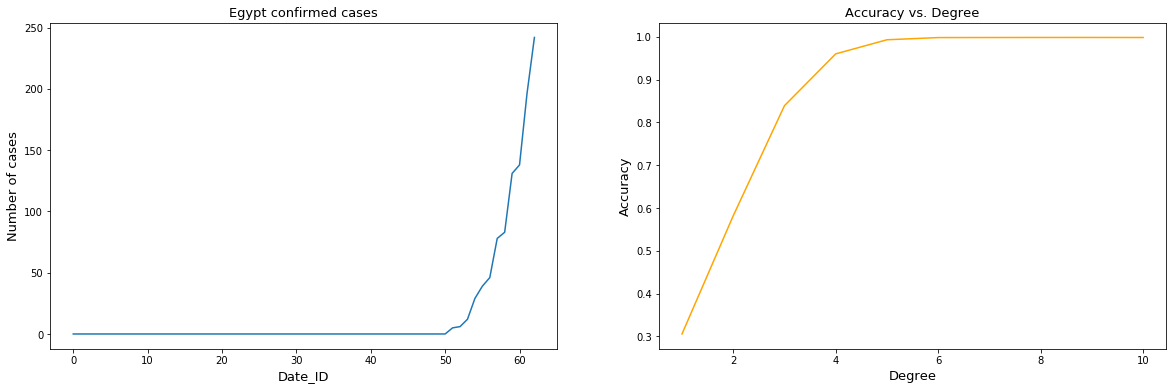

In [325]:
build_model('Egypt') # for Egypt

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -414.1570789225691%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -320.1581693123372%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -84.91146349141863%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 38.29876464189963%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 85.87076709194858%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 97.50172608393481%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 98.22654673436358%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.34041600311718%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 98.36974531923794%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 98.11854246421936%


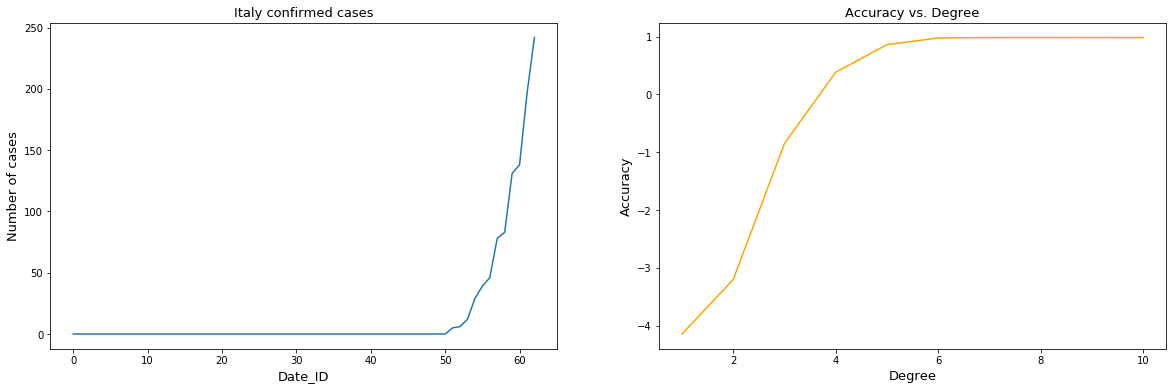

In [326]:
build_model('Italy') # for Italy